In [5]:
##MNIST
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
#print(tf.__version__)
fashion_mnist=keras.datasets.fashion_mnist



In [6]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()
class_names=["T_shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

4423680/4422102 [==============================] - 3s 1us/step


In [7]:
train_images.shape

(60000, 28, 28)

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [2]:
conda install matplotlib


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\NVRamanaRao\Anaconda3

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    kiwisolver-1.1.0           |   py37ha925a31_0          59 KB
    matplotlib-3.1.0           |   py37hc8f65d3_0         6.5 MB
    pyparsing-2.4.0            |             py_0          58 KB
    ------------------------------------------------------------
                                           Total:         6.6 MB

The following NEW packages will be INSTALLED:

  cycler             pkgs/main/win-64::cycler-0.10.0-py37_0
  kiwisolver         pkgs/main/win-64::kiwisolver-1.1.0-py37ha925a31_0
  matplotlib         pkgs/main/win-64::matplotlib-3.1.0-py37hc8f65d3_0
  pyparsing          pkgs/main/noarch::pyparsing-2.4.0-py_0




matplotlib-3.1.0     | 6.5 MB    |            |   0% 
ma

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
test_images.shape

(10000, 28, 28)

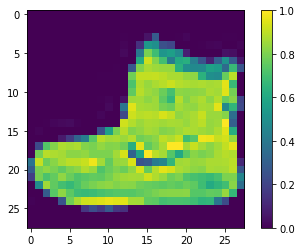

In [31]:
#plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
#plt.show()

In [20]:
train_images=train_images/255.0
test_images=test_images/255.0

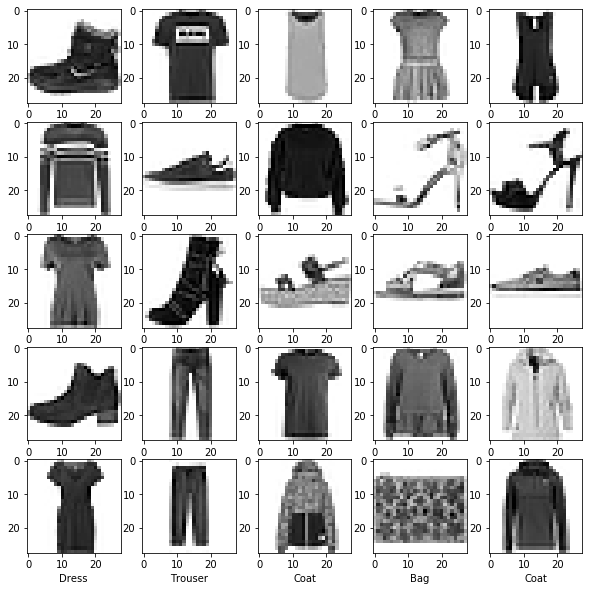

In [38]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    #plt.xticks([])
    #plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [75]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [76]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [77]:
model.fit(train_images,train_labels,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.4974 - acc: 0.8251
Epoch 2/20
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3719 - acc: 0.8656
Epoch 3/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3372 - acc: 0.8769
Epoch 4/20
60000/60000 [==============================] - 6s 96us/sample - loss: 0.3125 - acc: 0.8855
Epoch 5/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2954 - acc: 0.8914
Epoch 6/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2818 - acc: 0.8965
Epoch 7/20
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2700 - acc: 0.9008
Epoch 8/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2593 - acc: 0.9032
Epoch 9/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2469 - acc: 0.9081
Epoch 10/20
60000/60000 [==============================] - 5s 87us/sample - loss: 

In [78]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print("Test-accuracy :",test_acc)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.3650 - acc: 0.8829
Test-accuracy : 0.8829


In [79]:
predictions=model.predict(test_images)
predictions[0]

array([3.0838372e-13, 4.4514317e-15, 5.0465194e-15, 7.5898599e-17,
       1.3463290e-14, 1.2562556e-06, 4.1081322e-11, 5.7390548e-04,
       3.2776039e-13, 9.9942482e-01], dtype=float32)

In [80]:
np.argmax(predictions[0])

9

In [81]:
test_labels[0]

9

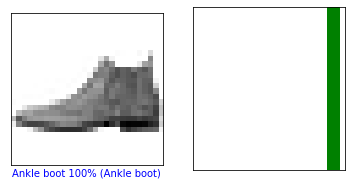

In [82]:
from pylab import *
def plot_image(i,predictions_array,true_label,img):
    predictions_array,true_label,img=predictions_array[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label=np.argmax(predictions_array)
    if predicted_label==true_label:
        color="blue"
    else:
        color="red"
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
              color=color)
def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label=predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(10),predictions_array,color="#777777")
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

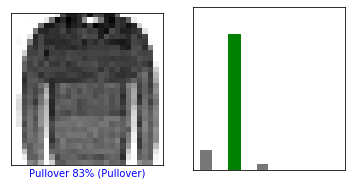

In [114]:
i=20
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

In [62]:
from pylab import *
def plot_image(i,predictions_array,true_label,img):
    predictions_array,true_label,img=predictions_array[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label=np.argmax(predictions_array)
    if predicted_label==true_label:
        color="blue"
    else:
        color="red"
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
              color=color)
def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label=predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(10),predictions_array,color="#777777")
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')


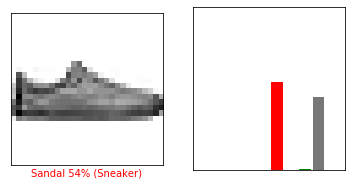

In [138]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

In [109]:

num_rows=5
num_columns=3
num_images=num_rows*num_columns
plt.figure(figsize=(2*2*num_columns, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_columns, 2*i+i)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
    plt.show()

ValueError: num must be 1 <= num <= 30, not 0

<Figure size 864x720 with 0 Axes>

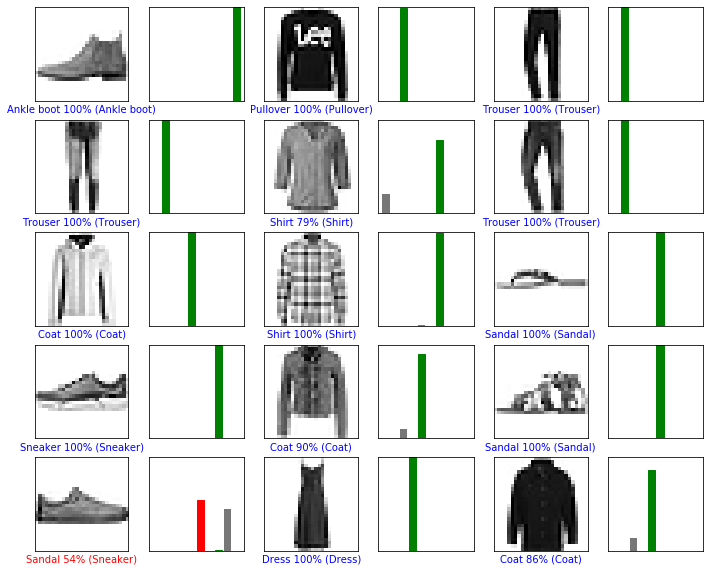

In [132]:
num_rows=5
num_columns=3
num_images=num_rows*num_columns
plt.figure(figsize=(2*2*num_columns, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_columns, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_columns, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [139]:
img2=test_images[12]
print(img2.shape)

(28, 28)


In [140]:
img2=(np.expand_dims(img2,0))
print(img2.shape)

(1, 28, 28)


In [141]:
predictions_single=model.predict(img2)
print(predictions_single)

[[1.1192153e-09 3.5078213e-07 2.7146516e-09 1.4414196e-08 4.6675509e-06
  5.4347986e-01 3.7222648e-08 9.0053705e-03 4.4750965e-01 6.7263919e-13]]


([<matplotlib.axis.XTick at 0x188e79879e8>,
 <a list of 10 Text xticklabel objects>)

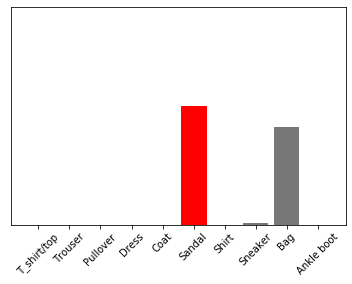

In [142]:
plot_value_array(0,predictions_single,test_labels)
plt.xticks(range(10),class_names,rotation=45)

In [107]:
np.argmax(predictions_single[0])

9